<a href="https://colab.research.google.com/github/cufuentes/CodingDojo/blob/main/Dec_tree_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [4]:
#cargar df
filename = "/content/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [5]:
#separamos conjuntos de ensayo y prueba
X = df.drop(columns="PRICE")
y = df["PRICE"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [7]:
#instanciamos el modelo
dec_tree = DecisionTreeRegressor(random_state=42)

#ajustamos el modelo
dec_tree.fit(X_train,y_train)

#obtenemos resultados
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

#evaluamos
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test,y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


In [8]:
#revisamos parametros
print(dec_tree.get_params())
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
20
360


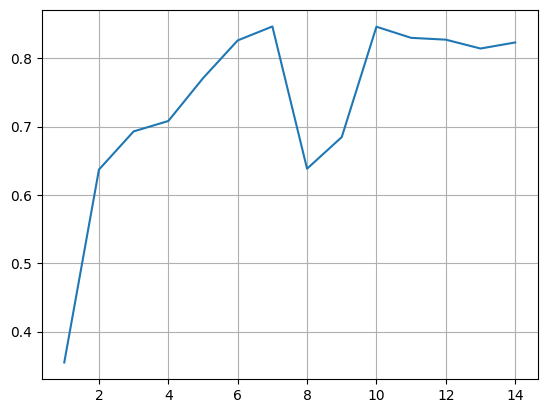

In [15]:
#buscamos parametros optimos
depth_list = list(range(1,15))
r2=[]
for depth in depth_list:
  dec_tree = DecisionTreeRegressor(random_state=42,max_depth=depth)
  dec_tree.fit(X_train,y_train)
  score = dec_tree.score(X_test,y_test)
  r2.append(score)

#graficcamos resultados
plt.plot(depth_list,r2)
plt.grid()
plt.show()

In [17]:
r2

[0.35488621492700445,
 0.6370379660938668,
 0.6928945219667566,
 0.7080984792681855,
 0.770697400084247,
 0.8259854674532312,
 0.8463768203632204,
 0.6383005344293057,
 0.6845876043422093,
 0.8460104271509634,
 0.8297363137769441,
 0.8271023856015939,
 0.814125554883834,
 0.8229955282755737]

In [16]:
#testeamos con max_depth = 7
dec_tree_7 = DecisionTreeRegressor(max_depth=7,random_state=42)
dec_tree_7.fit(X_train,y_train)
train_7_score = dec_tree_7.score(X_train,y_train)
test_7_score = dec_tree_7.score(X_test,y_test)
print(train_7_score)
print(test_7_score)

0.958516936961625
0.8463768203632204
